Student name: Akshata Bheemasamudra Mallikarjunappa

Student id: 23164204

# Task: Deep neural networks

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's also visualise a few random samples of this

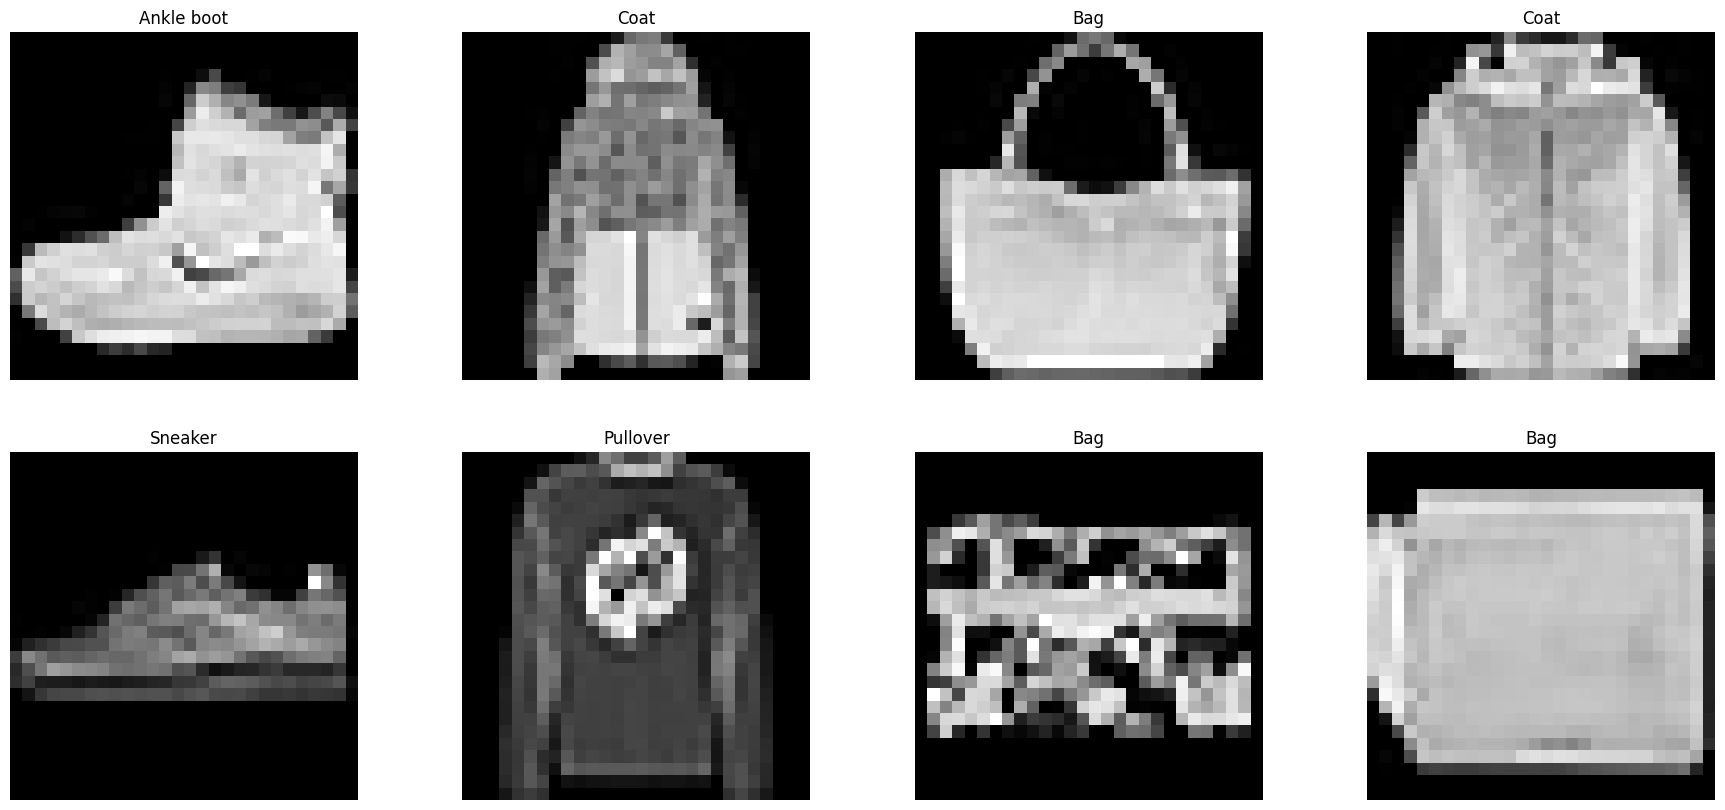

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Spliiting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

# Standardizing the train data by fit_transform method and test data by fitting.
scaler = StandardScaler()
Scaled_train_data = scaler.fit_transform(X_train)
Scaled_test_data = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [6]:
from sklearn.linear_model import Perceptron as Perceptron

#Setting up the perceptron model and training the data on perceptron model
perceptron = Perceptron(random_state=42)
perceptron.fit(Scaled_train_data,y_train)



Perceptron(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

# Predicting  on the train and test data
perc_predict = perceptron.predict(Scaled_train_data)
perceptron_predict = perceptron.predict(Scaled_test_data)

# Calculating training and test data accuracy
train_accuracy = accuracy_score(perc_predict,y_train)
test_accuracy = accuracy_score(perceptron_predict,y_test)

print(f'Accuracy score of training data: {train_accuracy} \n Accuracy score of test data: {test_accuracy} ')

Accuracy score of training data: 0.8365714285714285 
 Accuracy score of test data: 0.8165714285714286 


**3. Discuss the result, does it seem good or bad?**

The accuracy achieved by a single perceptron on test data is 81.1% which is good enough for a single perceptron to classify 10 classes however this is not good enough to be implemented for all the problem statements which involve image data, for example an application which includes detecting humans on road might need greater accuracy considering safety concerns however this result is good enough to perform basic level classification.

**4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)**

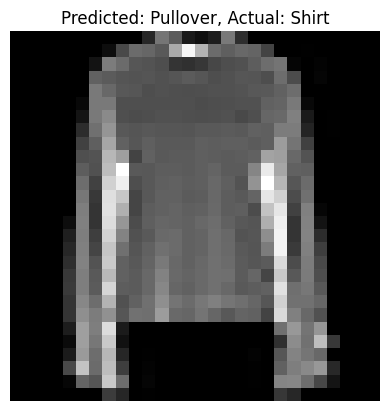

In [9]:
# Searching the incorrect prediction
incorrect_classification = np.where(perceptron_predict != y_test)[0][0]

plt.imshow(np.reshape(X_test[incorrect_classification], (-1, 28)), cmap='gray')
plt.title(f"Predicted: {text_labels[int(perceptron_predict[incorrect_classification])]}, Actual: {text_labels[int(y_test[incorrect_classification])]}")
plt.axis('off')
plt.show()


We can conclude that the data is too complex or that the classes are not easily separable due to its non-linear form, the model might find it difficult to find an accurate decision boundary.

(This example appeared in one of the multiple runs so far, From the above example, it is seen that the coat and pullover's outline are almost similar in terms of boundary line. And that the perceptron is a linear classification model, it was unable to ocnsider a new dimension in classifiying the data.)

**5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.**

The multi-class here refers to the target labels having multiple classes (as in the given MNIST fashion dataset) and not just binary classes (0/1) to be classified into.

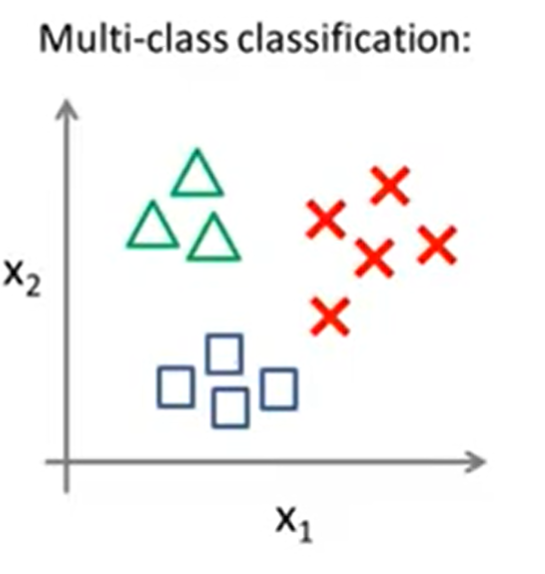

A perceptron in general is used for a binary linear classification however an extension of this, to classify multiple classes, we have the multi-class percetron which classifies multipe classes/categories. This modifies the original single layer neural network perceptron to handle multiple classses and should not be misunderstood as the multi layer perceptron.

One of the strategies used is the one-vs-all or one-vs-rest to perform multi-class classification.

Here, we will have x no of perceptrons for x no of classes to be classified. and each of these perceptrons are trained for each of the classes available and treating it as a positive class while the rest of the classes are treated as negative. For predicting the output, the class whose perceptron has the highest values get predicted.

ex: If we have 3 classes to be predicted, we will have three perceptrons each designated to the respective class. If the first perceptron gives the highest value , the first class be will be given out as the output and so on and so forth.

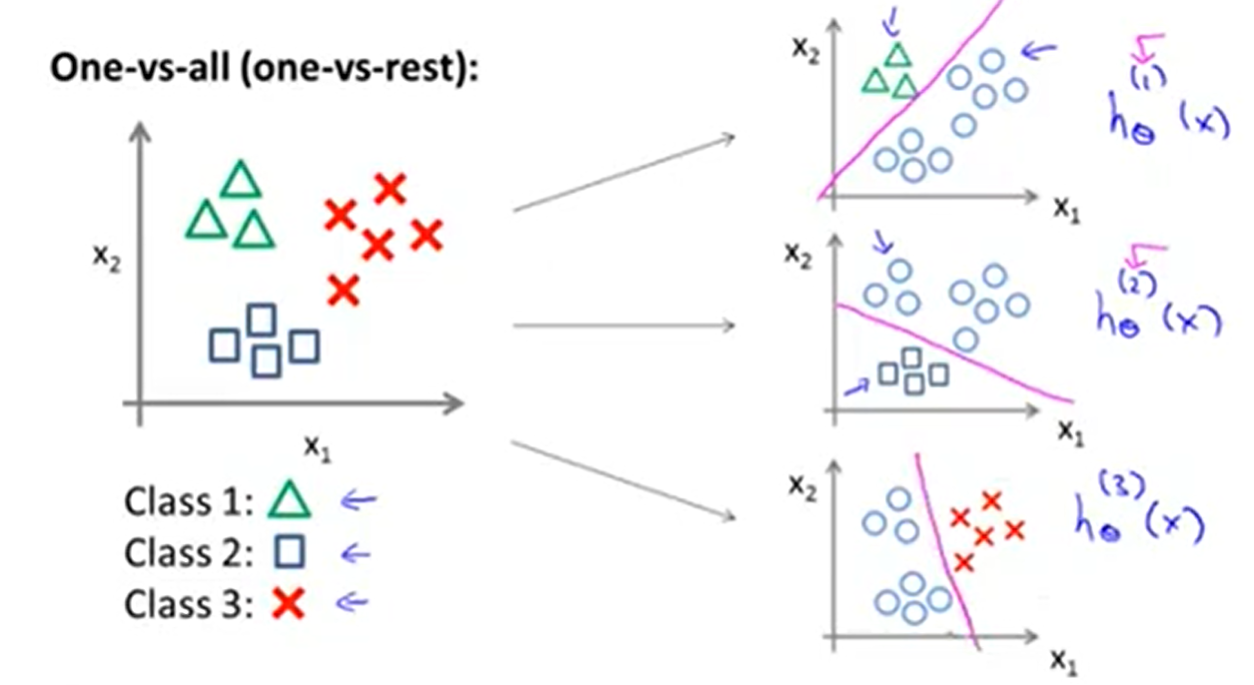

If we closely observe this is still acting as a binary classification.


In the image given below, if x1 to xd are different features, then the different summations are d perceptrons, thedecision function of each perceptron is calculated and weighed, whicever has the maximum/highest value is selected as the output.

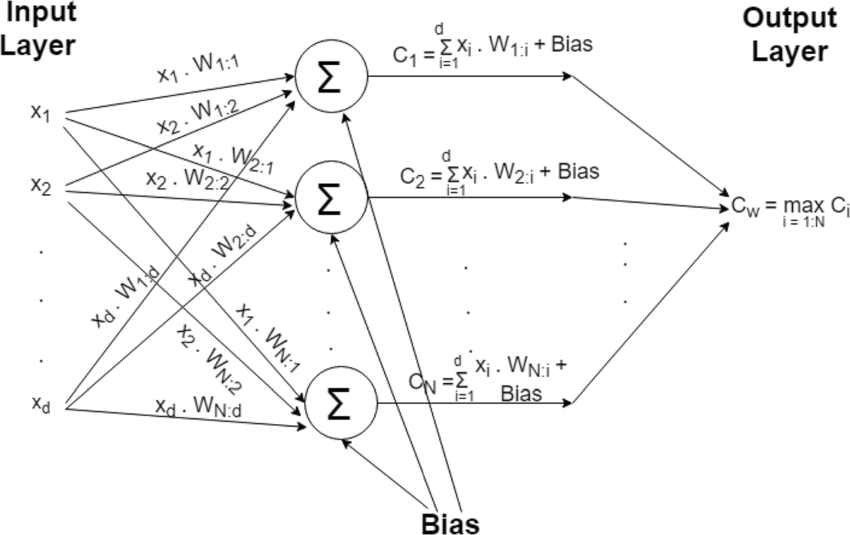

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [10]:
from sklearn.neural_network import MLPClassifier

# Setting up the multi-layer perceptron model
mlp_perceptron = MLPClassifier(hidden_layer_sizes=(20,),alpha=0.1,random_state=42,verbose=1)
# Fitting the train data on MLP model
mlp_perceptron.fit(Scaled_train_data,y_train)

Iteration 1, loss = 0.65226459
Iteration 2, loss = 0.43831608
Iteration 3, loss = 0.40226257
Iteration 4, loss = 0.38179829
Iteration 5, loss = 0.36728105
Iteration 6, loss = 0.35776215
Iteration 7, loss = 0.34954336
Iteration 8, loss = 0.34104124
Iteration 9, loss = 0.33694452
Iteration 10, loss = 0.33222178
Iteration 11, loss = 0.32780911
Iteration 12, loss = 0.32387997
Iteration 13, loss = 0.31965706
Iteration 14, loss = 0.31811203
Iteration 15, loss = 0.31457335
Iteration 16, loss = 0.31268883
Iteration 17, loss = 0.31055972
Iteration 18, loss = 0.30676419
Iteration 19, loss = 0.30477562
Iteration 20, loss = 0.30436365
Iteration 21, loss = 0.30079397
Iteration 22, loss = 0.29982949
Iteration 23, loss = 0.29793866
Iteration 24, loss = 0.29666269
Iteration 25, loss = 0.29636652
Iteration 26, loss = 0.29343013
Iteration 27, loss = 0.29297305
Iteration 28, loss = 0.29330393
Iteration 29, loss = 0.29037594
Iteration 30, loss = 0.28942154
Iteration 31, loss = 0.28910554
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), random_state=42, verbose=1)

In [11]:
from sklearn.metrics import accuracy_score
#Calculating accuracy score of training and test data of MLP model
print(f' Accuracy score of test data: {accuracy_score(mlp_perceptron.predict(Scaled_test_data),y_test)} ')
print(f' Accuracy score of training data: {accuracy_score(mlp_perceptron.predict(Scaled_train_data),y_train)}')

 Accuracy score of test data: 0.8692142857142857 
 Accuracy score of training data: 0.9312142857142857


#### Questions: (answer here)

**1. What is the size of the input layer here? Explain**

Each sample is a 28x28 grayscale. Input layer will be the total no of pixels in each image plus the bias weight. therefore, (28*28)+1 = 785

**2. What is the size of the output layer here? Explain**

Size of the output layer is 10 since we have 10 classes/categories in the target label.

**3. How many weights in total does the algorithm learn?**

We have,
input layer - 784 neuron
hidden layer - 20 neurons
output layer - 10 neurons
we have a bias of 20 and 10 respectively at each layer apart from input layer.

Weights between the input layer and hidden layer is (784x20)+20 and the weights between the hidden layer and the output layer is (200x10)+10.
Total = 15910

**4. What does it mean that the training accuracy and the test accuracy are different?**

The train accuracy is noticeably larger than the test accuracy which implies the model might be overfitting.


#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# list to store the test and train accuracy at each layer of neurons
a_test = []
a_train = []

# depth of each layer
widths = (20, 50, 100, 200)


#looping through each layer and fitting the train data on a MLP model
for i in widths:
  classifier = MLPClassifier(hidden_layer_sizes=(i,),alpha=0.1,random_state=42,verbose=1)
  classifier.fit(Scaled_train_data,y_train)

  # Storing the train and test accuracy at each layer
  a_test_score = accuracy_score(classifier.predict(Scaled_test_data),y_test)
  a_test.append(a_test_score)

  a_train_score = accuracy_score(classifier.predict(Scaled_train_data),y_train)
  a_train.append(a_train_score)

Iteration 1, loss = 0.65226459
Iteration 2, loss = 0.43831608
Iteration 3, loss = 0.40226257
Iteration 4, loss = 0.38179829
Iteration 5, loss = 0.36728105
Iteration 6, loss = 0.35776215
Iteration 7, loss = 0.34954336
Iteration 8, loss = 0.34104124
Iteration 9, loss = 0.33694452
Iteration 10, loss = 0.33222178
Iteration 11, loss = 0.32780911
Iteration 12, loss = 0.32387997
Iteration 13, loss = 0.31965706
Iteration 14, loss = 0.31811203
Iteration 15, loss = 0.31457335
Iteration 16, loss = 0.31268883
Iteration 17, loss = 0.31055972
Iteration 18, loss = 0.30676419
Iteration 19, loss = 0.30477562
Iteration 20, loss = 0.30436365
Iteration 21, loss = 0.30079397
Iteration 22, loss = 0.29982949
Iteration 23, loss = 0.29793866
Iteration 24, loss = 0.29666269
Iteration 25, loss = 0.29636652
Iteration 26, loss = 0.29343013
Iteration 27, loss = 0.29297305
Iteration 28, loss = 0.29330393
Iteration 29, loss = 0.29037594
Iteration 30, loss = 0.28942154
Iteration 31, loss = 0.28910554
Iteration 32, los

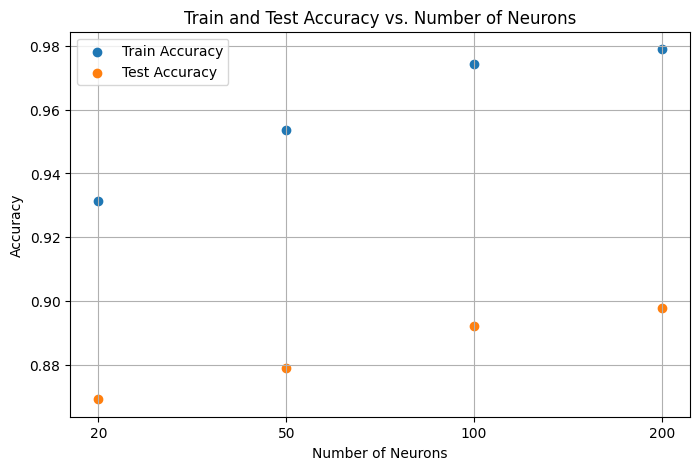

In [13]:
import matplotlib.pyplot as plt

x = np.arange(len(widths))

plt.figure(figsize=(8, 5))
plt.scatter(x,a_train ,label='Train Accuracy')
plt.scatter( x, a_test,label='Test Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.xticks(x,widths)
plt.legend()
plt.grid(True)
plt.show()




Questions:

**1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.**

The time taken to train the model at first layer was 1min 50 secs. However as the layer increased, the time increased as well, by a minute for the second layer, it doubled from the second layer to the third layer while the last layer took a good amount of 10 mins for the model to be trained.

**2. What can you infer from the graph?**
Firstly, we can see that the training accuracy and the test accuracy increases with the number of layers incorporated.

However there is a large difference between the train accuracy which is at almost 98% and test accuracy which is at almost 89% and this
implies the model might be overfitting.

For the number of neurons we have tested, the best is 100.

And the weights learned by the algorithms for this layer is ((784x100)+100)+((100x10)+10) = 79510.



----
For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting). ---

<font color='red'>Enter your text here</font>

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [9]:
########################

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []


for i in layers:
  classifier = MLPClassifier(hidden_layer_sizes=(i),alpha=0.1,random_state=42,verbose=1)
  classifier.fit(train_data,y_train)

  a_test_score = accuracy_score(classifier.predict(test_data),y_test)
  a_test.append(a_test_score)

  a_train_score = accuracy_score(classifier.predict(train_data),y_train)
  a_train.append(a_train_score)

Iteration 1, loss = 0.70684705
Iteration 2, loss = 0.43560754
Iteration 3, loss = 0.40064443
Iteration 4, loss = 0.37844814
Iteration 5, loss = 0.36391479
Iteration 6, loss = 0.35184596
Iteration 7, loss = 0.34412505
Iteration 8, loss = 0.33520346
Iteration 9, loss = 0.33050168
Iteration 10, loss = 0.32438497
Iteration 11, loss = 0.32004880
Iteration 12, loss = 0.31600846
Iteration 13, loss = 0.31209189
Iteration 14, loss = 0.30914007
Iteration 15, loss = 0.30735764
Iteration 16, loss = 0.30254147
Iteration 17, loss = 0.30029569
Iteration 18, loss = 0.29672971
Iteration 19, loss = 0.29660249
Iteration 20, loss = 0.29394376
Iteration 21, loss = 0.29142615
Iteration 22, loss = 0.28886795
Iteration 23, loss = 0.28839186
Iteration 24, loss = 0.28581179
Iteration 25, loss = 0.28233294
Iteration 26, loss = 0.28248192
Iteration 27, loss = 0.28077602
Iteration 28, loss = 0.27855690
Iteration 29, loss = 0.27830910
Iteration 30, loss = 0.27631672
Iteration 31, loss = 0.27603916
Iteration 32, los

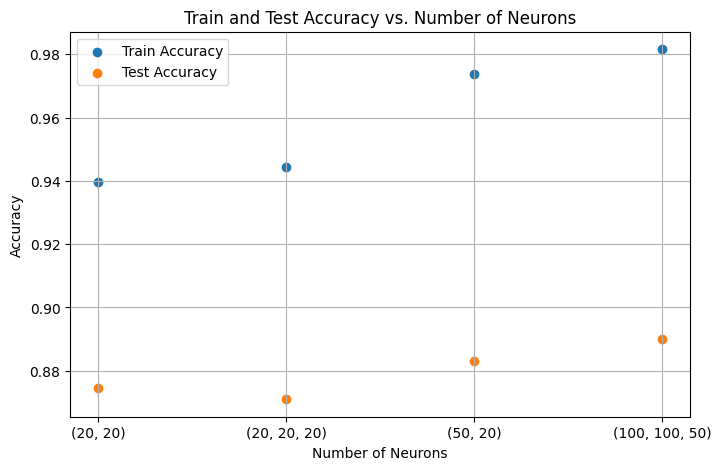

In [10]:
import matplotlib.pyplot as plt

layer = [(20,20),(20,20,20),(50,20),(100,100,50)]
X = np.arange(len(layers))

plt.figure(figsize=(8, 5))
plt.scatter(X,a_train ,label='Train Accuracy')
plt.scatter(X, a_test,label='Test Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.xticks(X,layers)
plt.legend()
plt.grid(True)
plt.show()

#### Questions

**What can you infer from the graph? (answer in the text box here).**

The more number of layers with more number of neurons, the model performed better however there is still some discrepancy with the training and test accuracy making it an overfitting model.


**Do I have a deeper network that has fewer neurons but is doing better than my very wide network?**

No, we don't have a deeper network with fewer neurons performing better than wide network.

**How many weights did I need to train?**

(20,20)

(784 * 20) + 20 + (20 * 20) + 20 + (20 * 10) + 10 = 16330

(20,20,20)

(784 * 20) + 20 + (20 * 20) + 20 + (20 * 20) + 20 + (20 * 10) + 10 = 16750

(50,20)

(784 * 50) + 50 + (50 * 20) + 20 + (20 * 10) + 10 = 40480

(100,100,50)

(784 * 100) + 100 + (100 * 100) + 100 + (100 * 50) + 50 + (50 * 10) + 10 = 94160



<font color='red'>Enter your text here</font>




## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.


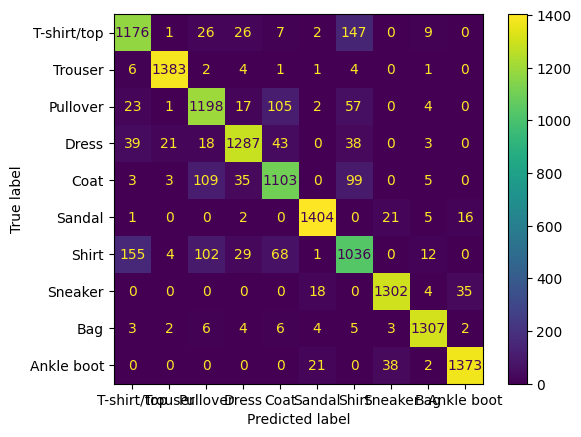

In [16]:
# importing the confusion matrix library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, classifier.predict(Scaled_test_data), labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=text_labels)
disp.plot()


<font color='red'>Enter your text here</font>

The confusion matrix is a way to display the correct and incorrectly classified classes. The diagonal reperesent the number of classes classified correctly.

Considering huge number of misclassifications, shirt is likely to be misclassified as T-shirt for 155 records and as pullover for 102 records.